


outlier analysis and treatment
EDA
correlation

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


import data

In [2]:
df=pd.read_csv(r'C:\Users\mrdee\OneDrive\Desktop\ds\3-2\week-10\diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


descriptive statistics

In [5]:
col=df.Pregnancies.unique()
print(col,len(col))
#continuous

[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14] 17


In [6]:
col=df.Glucose.unique()
print(col,len(col))
#continuous

[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190] 136


In [7]:
col=df.BloodPressure.unique()
print(col,len(col))
#continuous

[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114] 47


- range : 60 - 

In [8]:
col=df.SkinThickness.unique()
print(col,len(col))
#continuous

[35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8
 49 63 99] 51


- scale : micrometers
- range : 0.5-6.0 mm

In [9]:
col=df.Insulin.unique()
print(col,len(col))
#continuous

[  0  94 168  88 543 846 175 230  83  96 235 146 115 140 110 245  54 192
 207  70 240  82  36  23 300 342 304 142 128  38 100  90 270  71 125 176
  48  64 228  76 220  40 152  18 135 495  37  51  99 145 225  49  50  92
 325  63 284 119 204 155 485  53 114 105 285 156  78 130  55  58 160 210
 318  44 190 280  87 271 129 120 478  56  32 744 370  45 194 680 402 258
 375 150  67  57 116 278 122 545  75  74 182 360 215 184  42 132 148 180
 205  85 231  29  68  52 255 171  73 108  43 167 249 293  66 465  89 158
  84  72  59  81 196 415 275 165 579 310  61 474 170 277  60  14  95 237
 191 328 250 480 265 193  79  86 326 188 106  65 166 274  77 126 330 600
 185  25  41 272 321 144  15 183  91  46 440 159 540 200 335 387  22 291
 392 178 127 510  16 112] 186


In [10]:
col=df.BMI.unique()
print(col,len(col))
#continuous

[33.6 26.6 23.3 28.1 43.1 25.6 31.  35.3 30.5  0.  37.6 38.  27.1 30.1
 25.8 30.  45.8 29.6 43.3 34.6 39.3 35.4 39.8 29.  36.6 31.1 39.4 23.2
 22.2 34.1 36.  31.6 24.8 19.9 27.6 24.  33.2 32.9 38.2 37.1 34.  40.2
 22.7 45.4 27.4 42.  29.7 28.  39.1 19.4 24.2 24.4 33.7 34.7 23.  37.7
 46.8 40.5 41.5 25.  25.4 32.8 32.5 42.7 19.6 28.9 28.6 43.4 35.1 32.
 24.7 32.6 43.2 22.4 29.3 24.6 48.8 32.4 38.5 26.5 19.1 46.7 23.8 33.9
 20.4 28.7 49.7 39.  26.1 22.5 39.6 29.5 34.3 37.4 33.3 31.2 28.2 53.2
 34.2 26.8 55.  42.9 34.5 27.9 38.3 21.1 33.8 30.8 36.9 39.5 27.3 21.9
 40.6 47.9 50.  25.2 40.9 37.2 44.2 29.9 31.9 28.4 43.5 32.7 67.1 45.
 34.9 27.7 35.9 22.6 33.1 30.4 52.3 24.3 22.9 34.8 30.9 40.1 23.9 37.5
 35.5 42.8 42.6 41.8 35.8 37.8 28.8 23.6 35.7 36.7 45.2 44.  46.2 35.
 43.6 44.1 18.4 29.2 25.9 32.1 36.3 40.  25.1 27.5 45.6 27.8 24.9 25.3
 37.9 27.  26.  38.7 20.8 36.1 30.7 32.3 52.9 21.  39.7 25.5 26.2 19.3
 38.1 23.5 45.5 23.1 39.9 36.8 21.8 41.  42.2 34.4 27.2 36.5 29.8 39.2
 38.4 36.

- range : 17 - 30 

In [11]:
col=df.DiabetesPedigreeFunction.unique()
print(col,max(col),min(col),len(col))
#continuous

[0.627 0.351 0.672 0.167 2.288 0.201 0.248 0.134 0.158 0.232 0.191 0.537
 1.441 0.398 0.587 0.484 0.551 0.254 0.183 0.529 0.704 0.388 0.451 0.263
 0.205 0.257 0.487 0.245 0.337 0.546 0.851 0.267 0.188 0.512 0.966 0.42
 0.665 0.503 1.39  0.271 0.696 0.235 0.721 0.294 1.893 0.564 0.586 0.344
 0.305 0.491 0.526 0.342 0.467 0.718 0.962 1.781 0.173 0.304 0.27  0.699
 0.258 0.203 0.855 0.845 0.334 0.189 0.867 0.411 0.583 0.231 0.396 0.14
 0.391 0.37  0.307 0.102 0.767 0.237 0.227 0.698 0.178 0.324 0.153 0.165
 0.443 0.261 0.277 0.761 0.255 0.13  0.323 0.356 0.325 1.222 0.179 0.262
 0.283 0.93  0.801 0.207 0.287 0.336 0.247 0.199 0.543 0.192 0.588 0.539
 0.22  0.654 0.223 0.759 0.26  0.404 0.186 0.278 0.496 0.452 0.403 0.741
 0.361 1.114 0.457 0.647 0.088 0.597 0.532 0.703 0.159 0.268 0.286 0.318
 0.272 0.572 0.096 1.4   0.218 0.085 0.399 0.432 1.189 0.687 0.137 0.637
 0.833 0.229 0.817 0.204 0.368 0.743 0.722 0.256 0.709 0.471 0.495 0.18
 0.542 0.773 0.678 0.719 0.382 0.319 0.19  0.956 0.084

- range : 0.07-2.42

In [12]:
col=df.Age.unique()
print(col,len(col))
#continuous

[50 31 32 21 33 30 26 29 53 54 34 57 59 51 27 41 43 22 38 60 28 45 35 46
 56 37 48 40 25 24 58 42 44 39 36 23 61 69 62 55 65 47 52 66 49 63 67 72
 81 64 70 68] 52


In [13]:
col=df.Outcome.unique()
print(col,len(col))
#nominal-categorical

[1 0] 2


missing values anaalysis and tratment

In [14]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

there are no missing values

outlier analysis and treatment

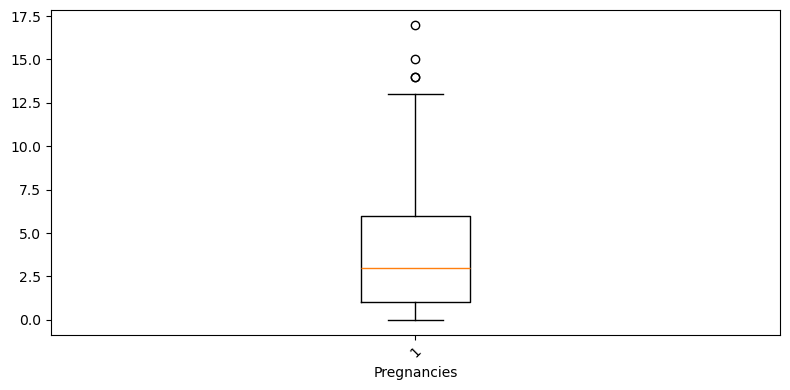

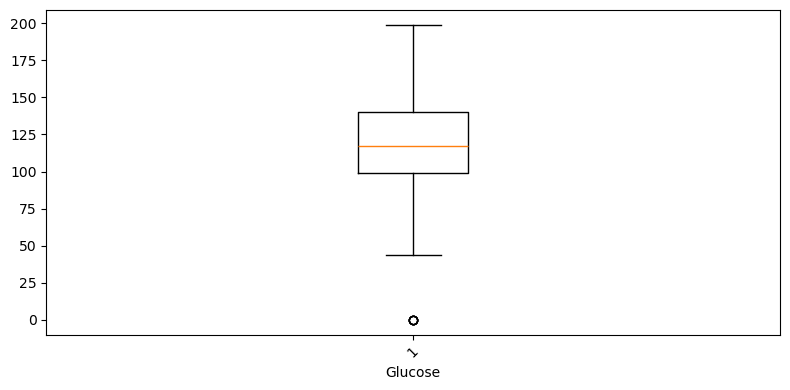

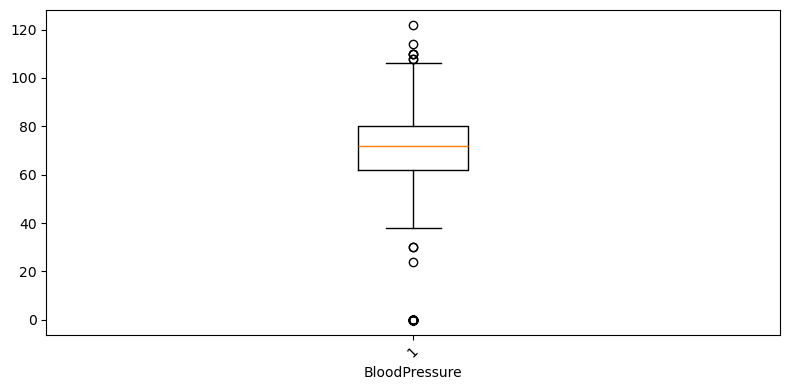

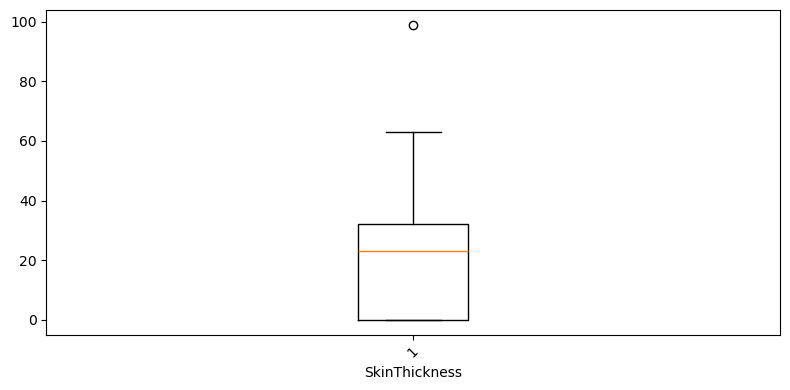

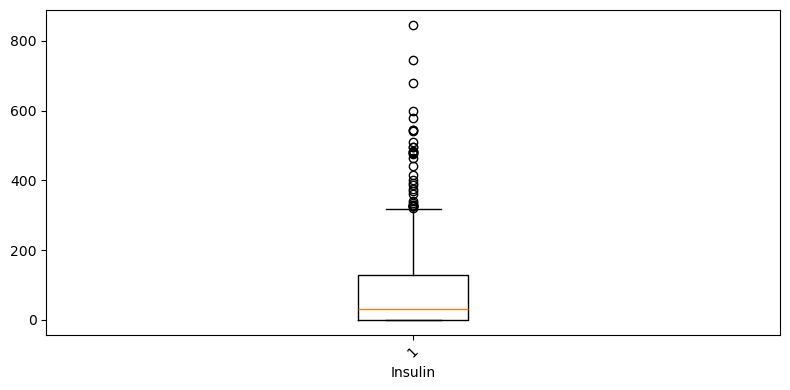

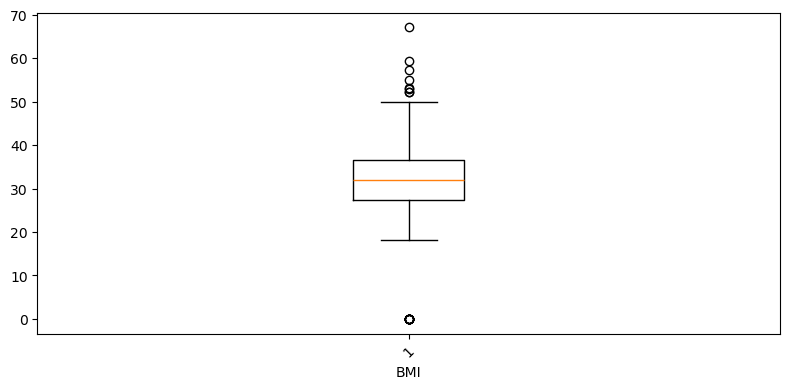

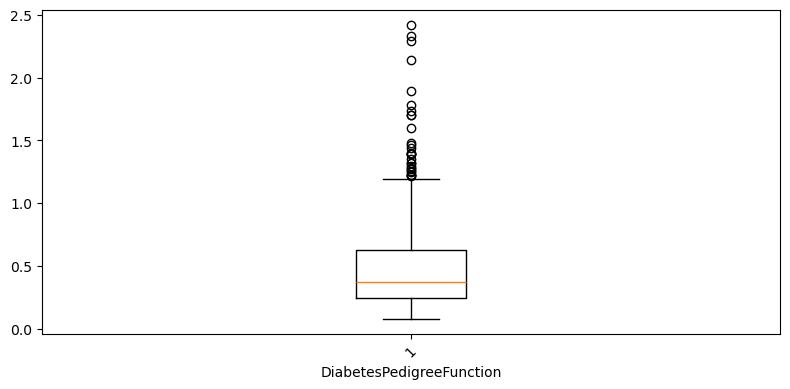

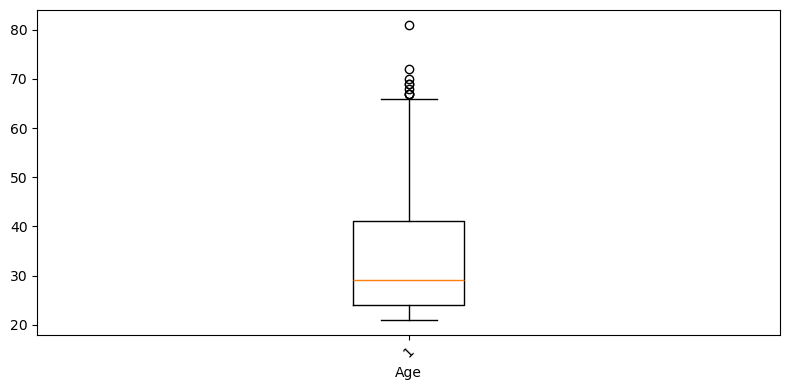

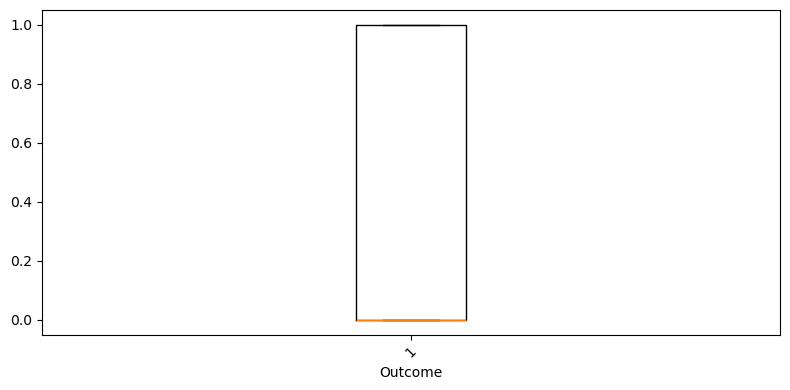

In [15]:
for col in df.columns:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[col])
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

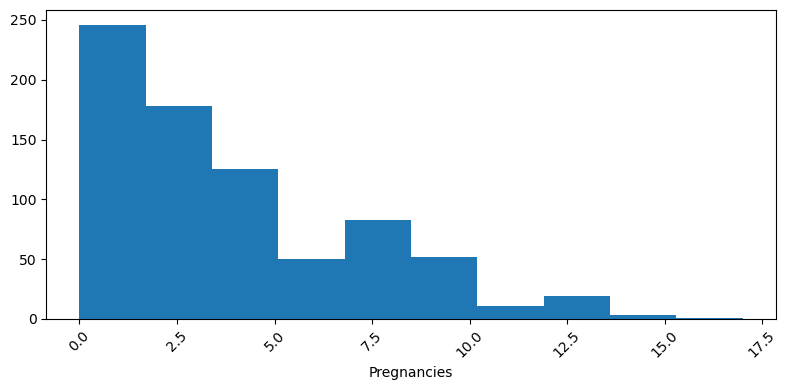

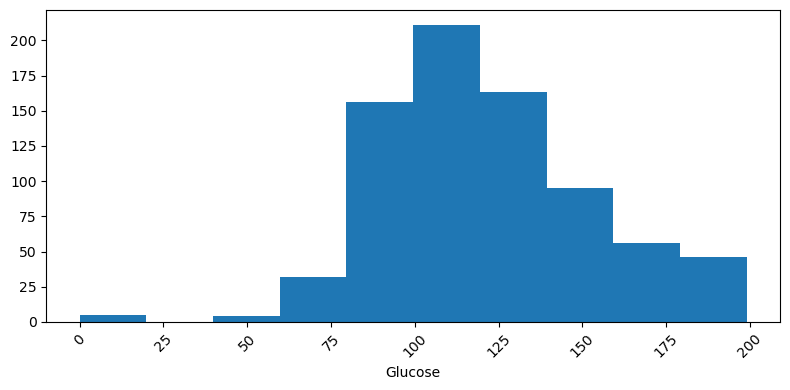

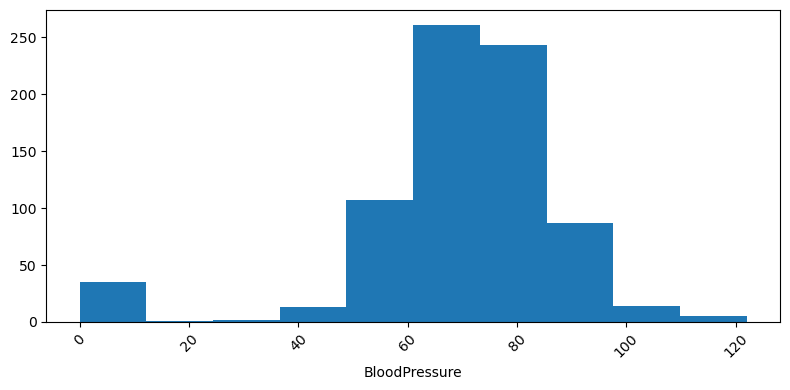

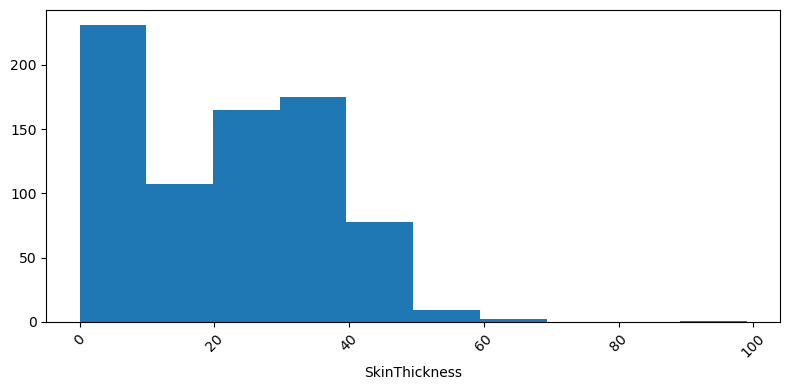

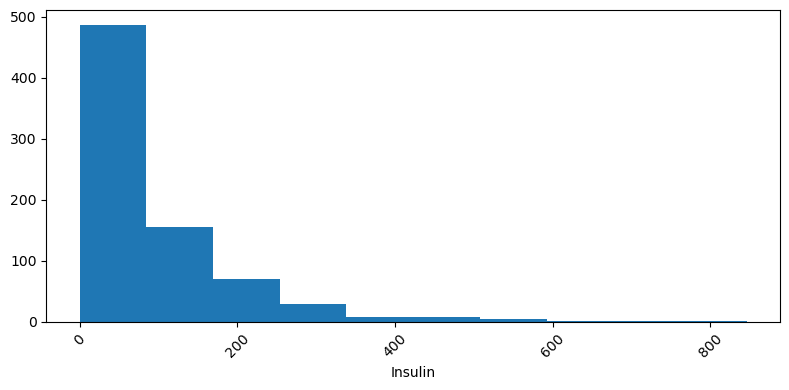

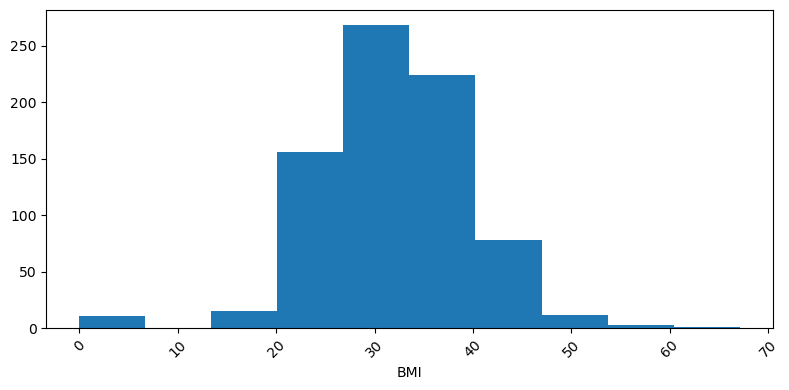

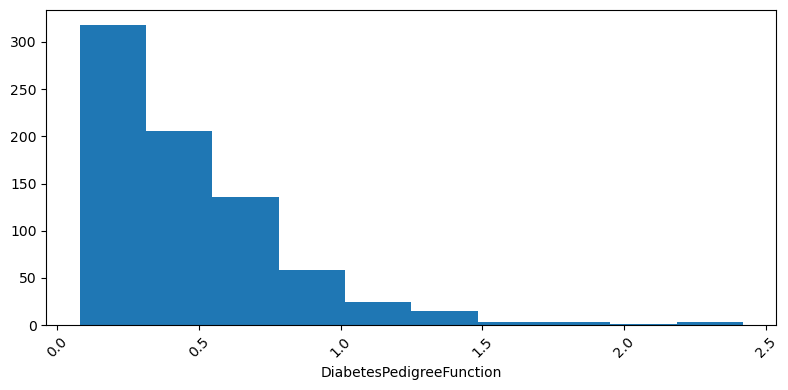

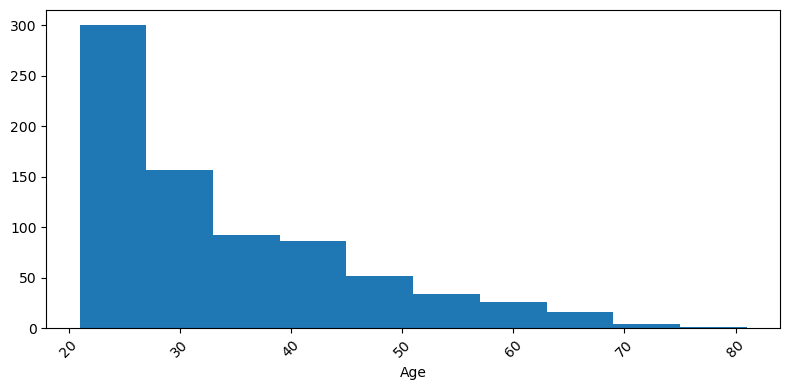

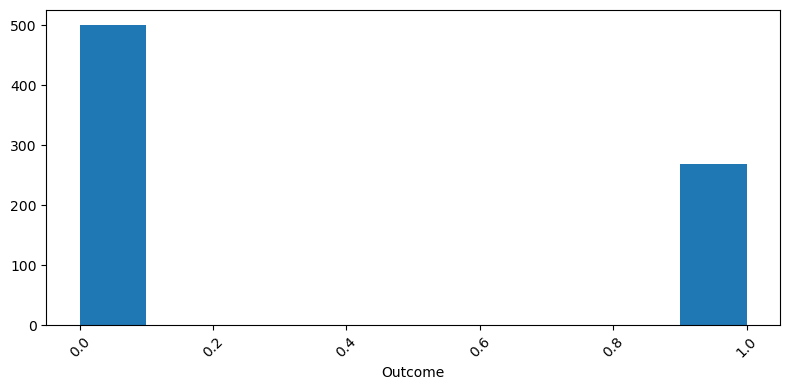

In [16]:
for col in df.columns:
    plt.figure(figsize=(8,4))
    plt.hist(df[col])
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [17]:
df['Glucose']

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64

In [18]:
for col in df.columns:
    df[col].replace(0,df[col].median(),inplace=True)

C:\Users\mrdee\AppData\Local\Temp\ipykernel_4212\1918385745.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(0,df[col].median(),inplace=True)


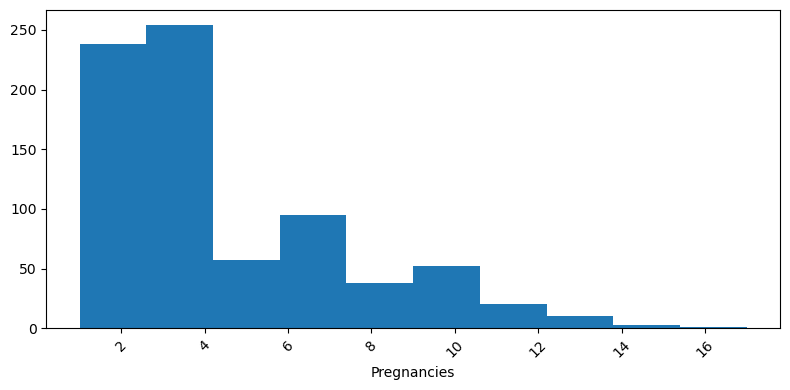

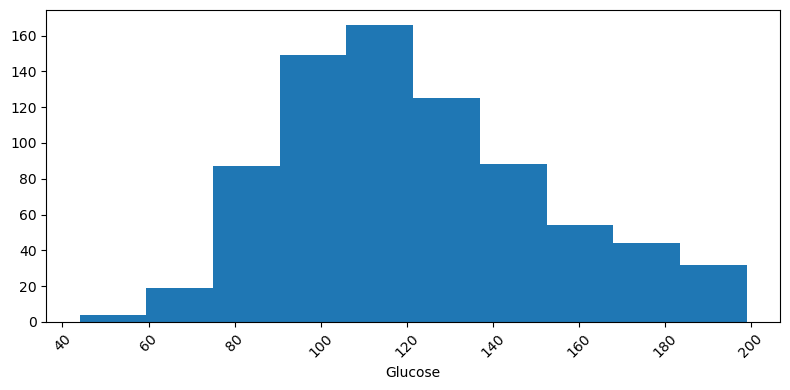

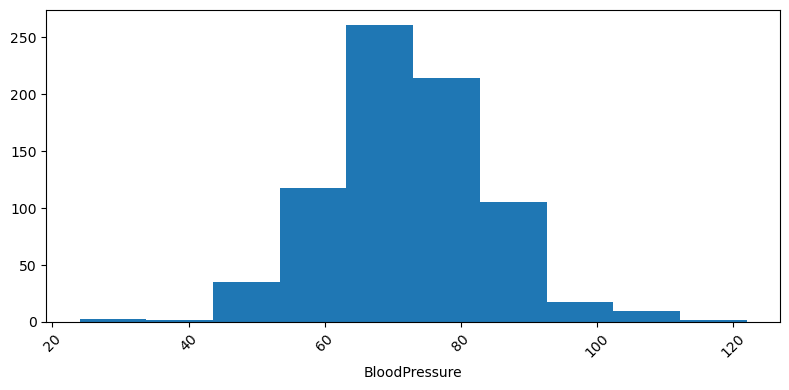

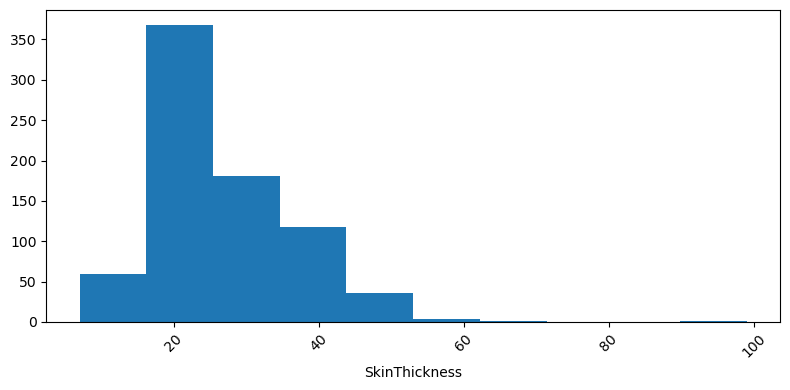

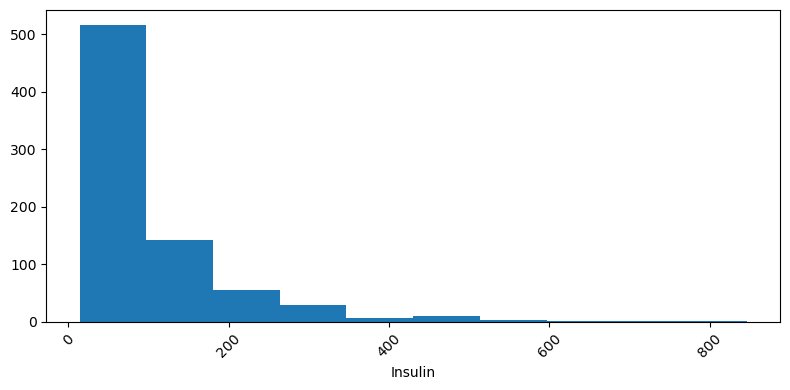

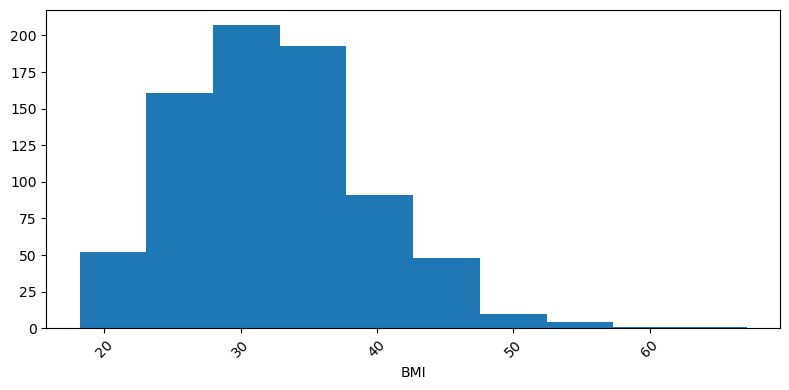

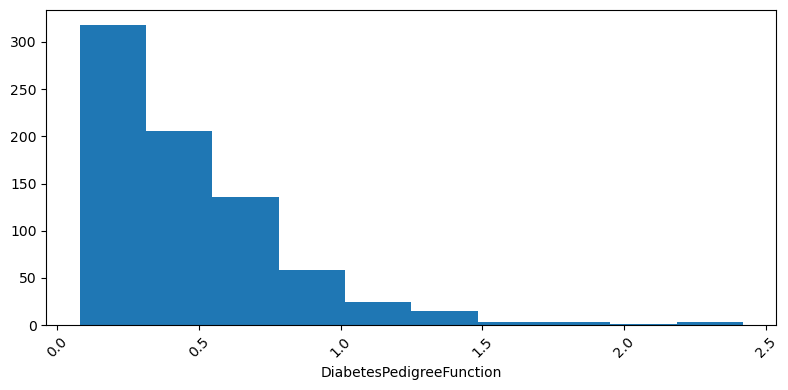

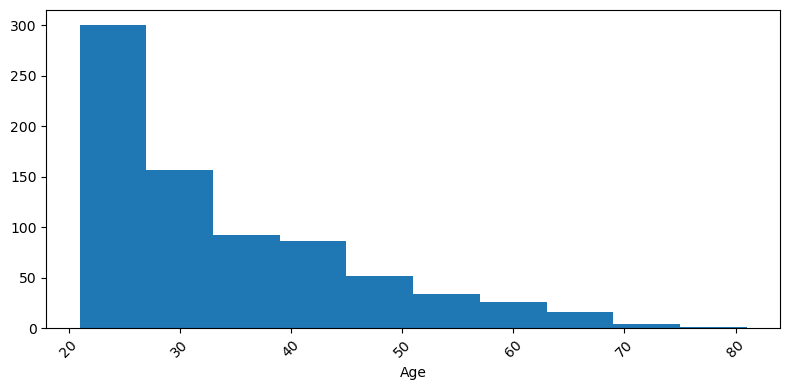

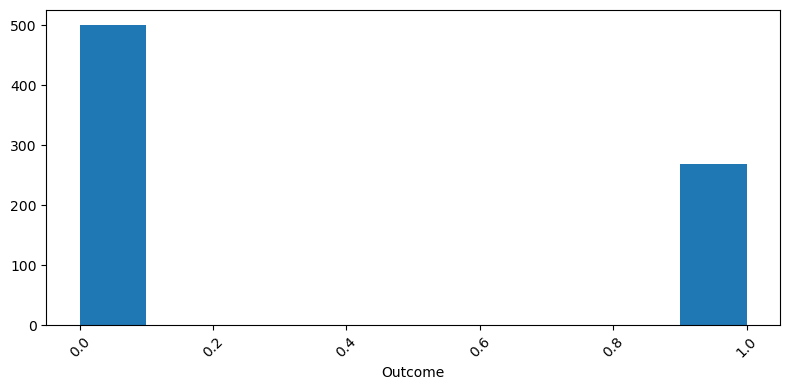

In [19]:
for col in df.columns:
    plt.figure(figsize=(8,4))
    plt.hist(df[col])
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [20]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(cor, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.tight_layout()
plt.show()

NameError: name 'cor' is not defined

<Figure size 1000x800 with 0 Axes>

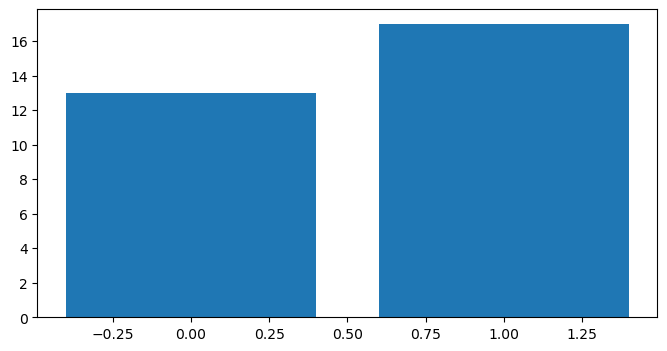

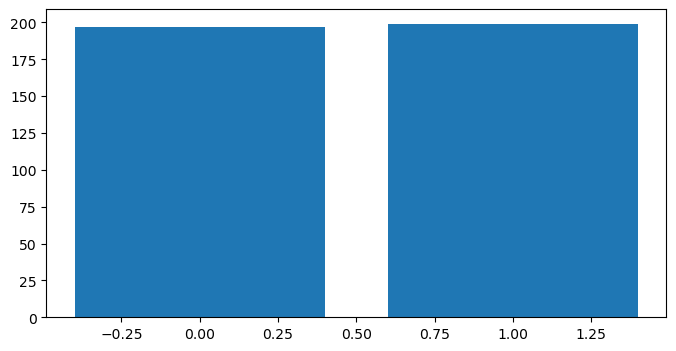

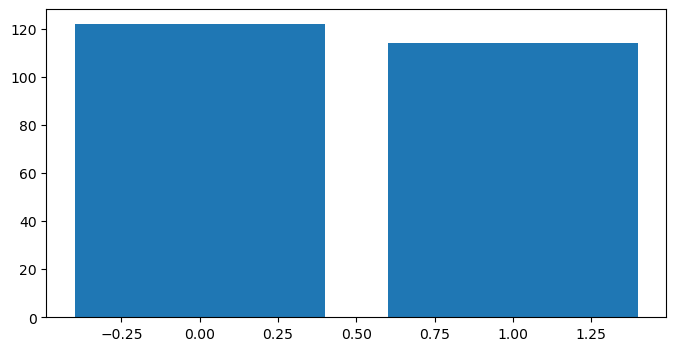

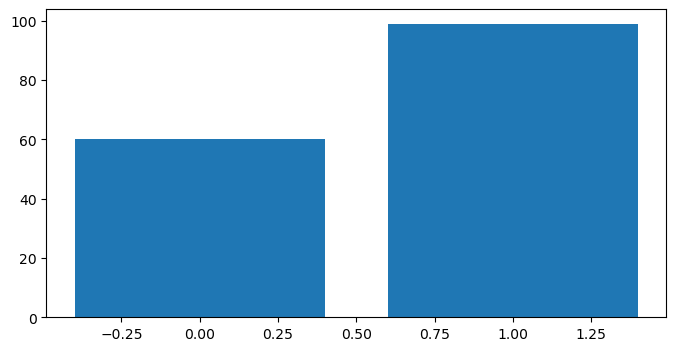

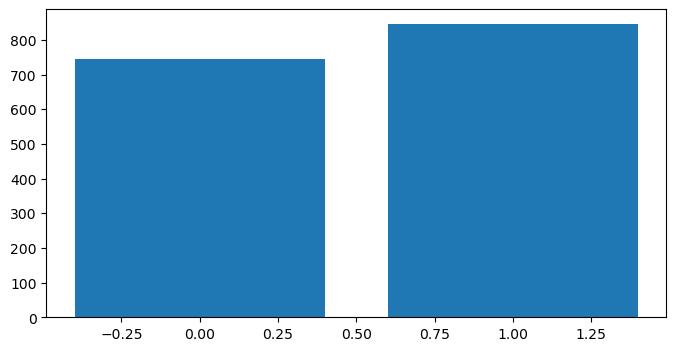

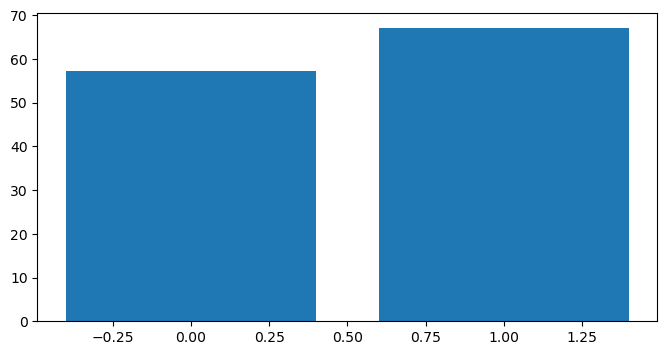

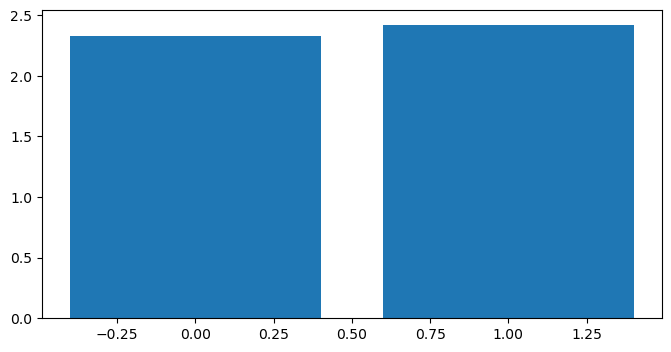

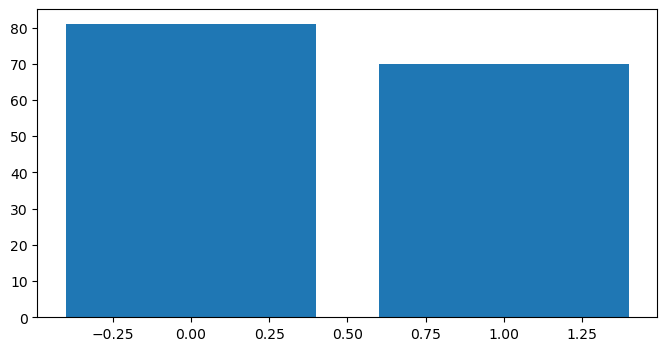

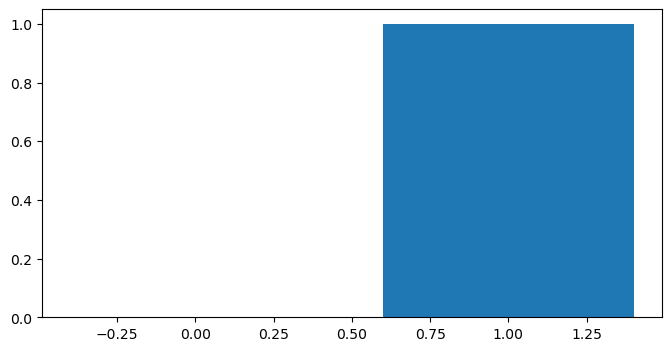

In [21]:
for col in df.columns:
    plt.figure(figsize=(8,4))
    plt.bar(df.Outcome,df[col])

In [22]:
df.groupby(['Age', 'Outcome']).mean()

Pregnancies     Glucose  BloodPressure  SkinThickness  \
Age Outcome                                                          
21  0           2.051724  107.655172      66.758621      22.879310   
    1           2.400000  139.400000      70.800000      33.600000   
22  0           2.081967  103.819672      65.704918      23.180328   
    1           3.272727  153.818182      72.363636      30.636364   
23  0           2.096774  109.032258      69.032258      26.161290   
...                  ...         ...            ...            ...   
68  0           8.000000   91.000000      82.000000      23.000000   
69  0           5.000000  134.000000      81.000000      23.000000   
70  1           4.000000  145.000000      82.000000      18.000000   
72  0           2.000000  119.000000      72.000000      23.000000   
81  0           9.000000  134.000000      74.000000      33.000000   

                Insulin        BMI  DiabetesPedigreeFunction  
Age Outcome                                                   
21  0         82.008621  28.632759                  0.415828  
    1        147.300000  37.560000                  0.642600  
22  0         80.155738  29.560656                  0.389574  
    1        123.454545  35.045455                  0.658273  
23  0        140.000000  30.693548                  0.431581  
...                 ...        ...                       ...  
68  0         30.500000  35.600000                  0.587000  
69  0         30.500000  29.400000                  0.413000  
70  1         30.500000  32.500000                  0.235000  
72  0         30.500000  19.600000                  0.832000  
81  0         60.000000  25.900000                  0.460000  

[96 rows x 7 columns]

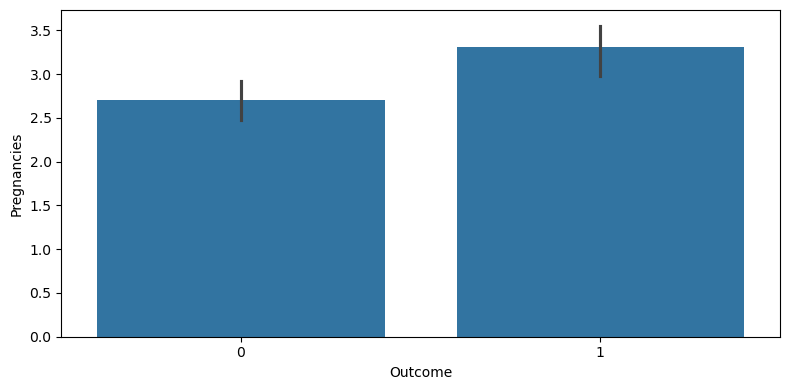

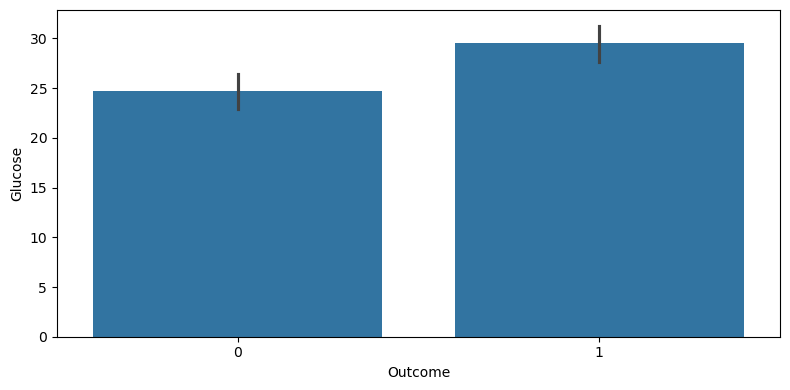

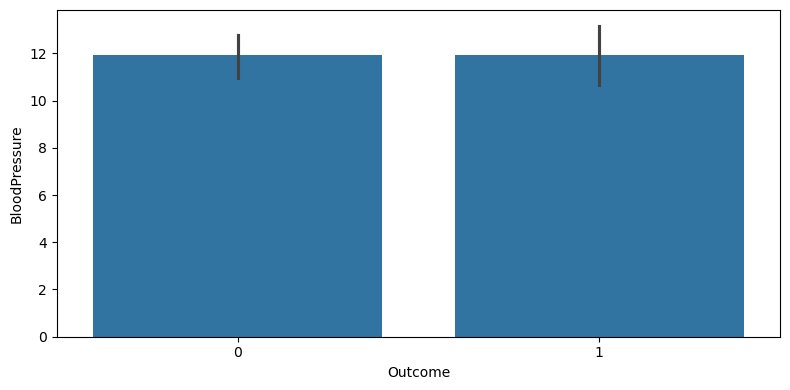

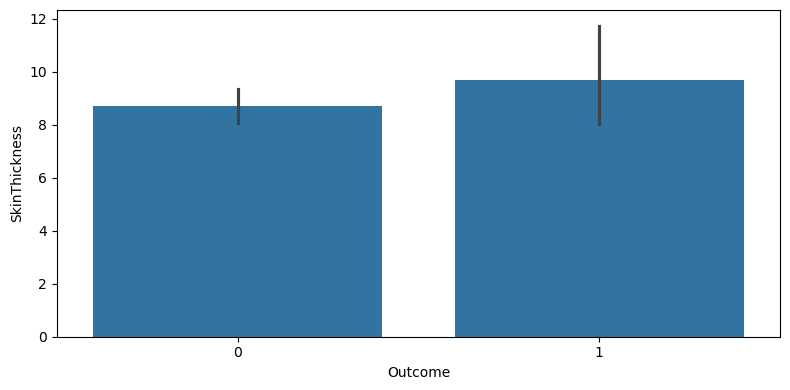

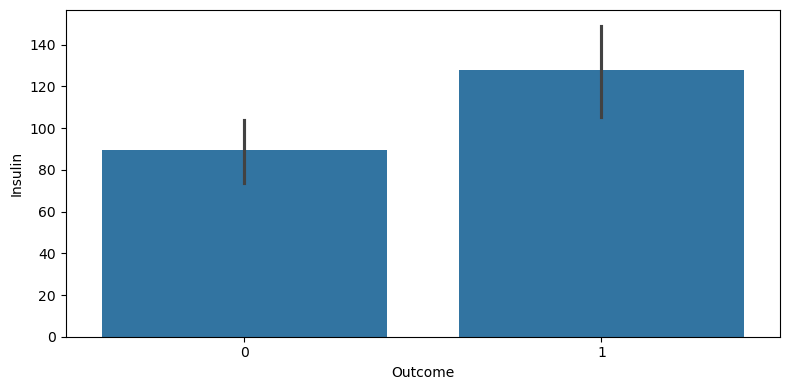

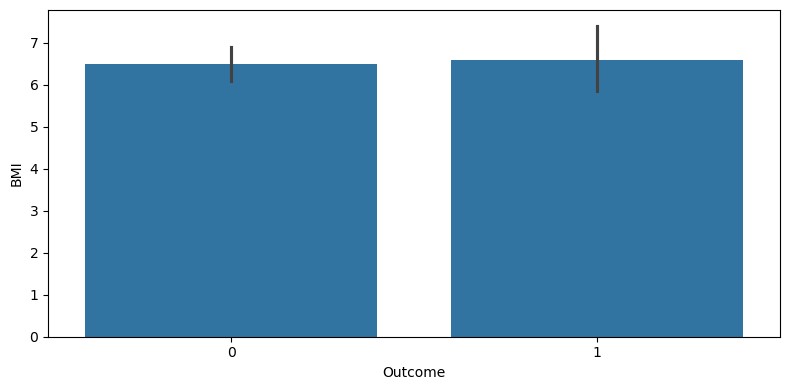

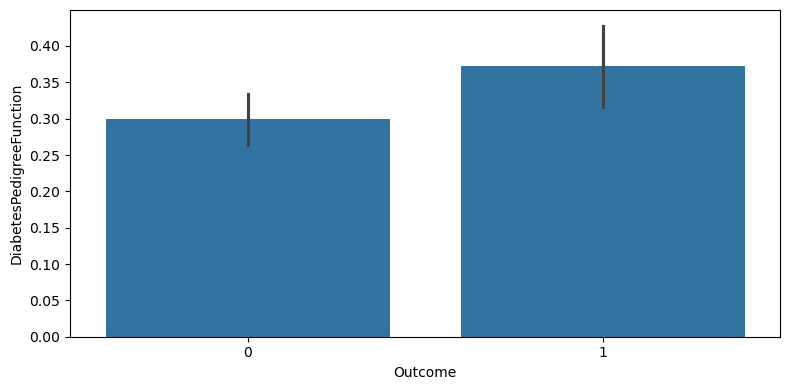

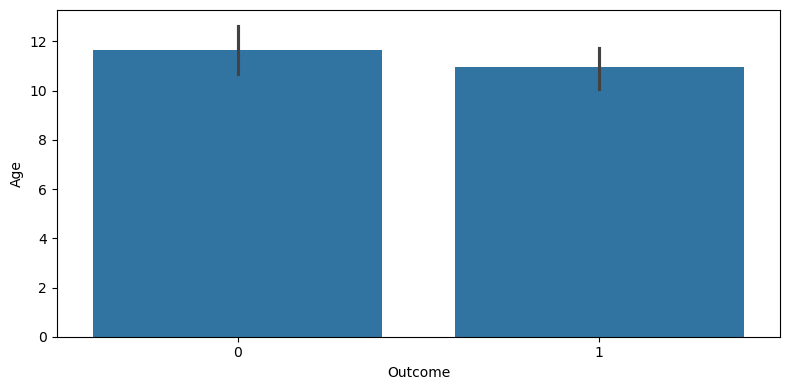

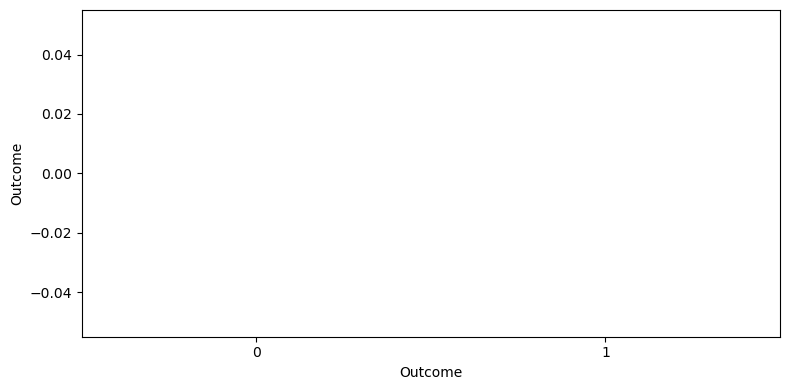

In [23]:
for col in df.columns:
    plt.figure(figsize=(8,4))
    sns.barplot(x=df.Outcome, y=df[col], estimator='std')
    plt.xlabel('Outcome')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [24]:
df['Age'].groupby(df['Outcome']).std()

Outcome
0    11.667655
1    10.968254
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

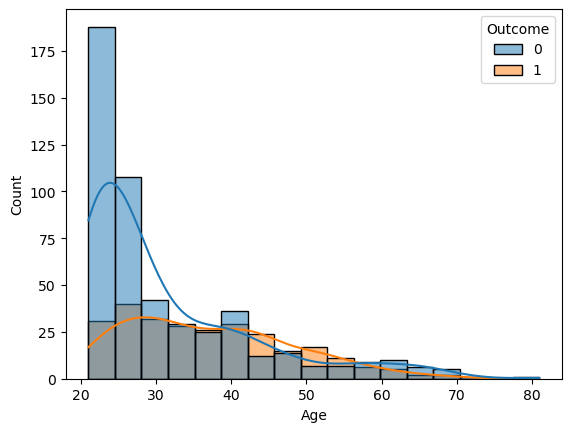

In [25]:
sns.histplot(x='Age',hue='Outcome',data=df,kde=True)

In [26]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

std
 Outcome
0    6.503074
1    6.596704
Name: BMI, dtype: float64
mean
 Outcome
0    30.880200
1    35.381343
Name: BMI, dtype: float64


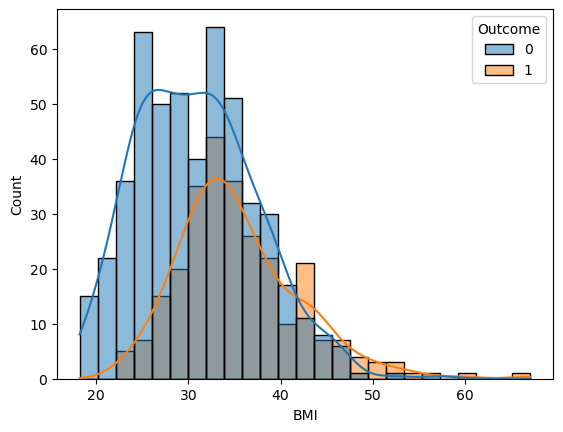

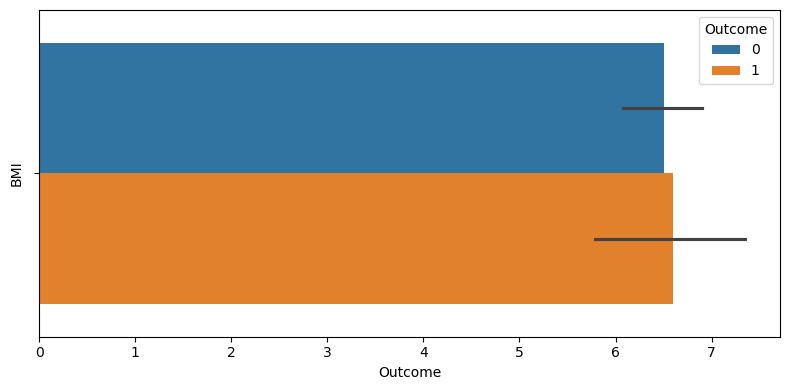

In [27]:
print('std\n',df['BMI'].groupby(df['Outcome']).std())
print('mean\n',df['BMI'].groupby(df['Outcome']).mean())
sns.histplot(x='BMI',hue='Outcome',data=df,kde=True)
plt.figure(figsize=(8,4))
sns.barplot(hue=df.Outcome, x=df['BMI'], estimator='std')
plt.xlabel('Outcome')
plt.ylabel('BMI')
plt.tight_layout()
plt.show()

std
 Outcome
0    11.667655
1    10.968254
Name: Age, dtype: float64
mean
 Outcome
0    31.190000
1    37.067164
Name: Age, dtype: float64


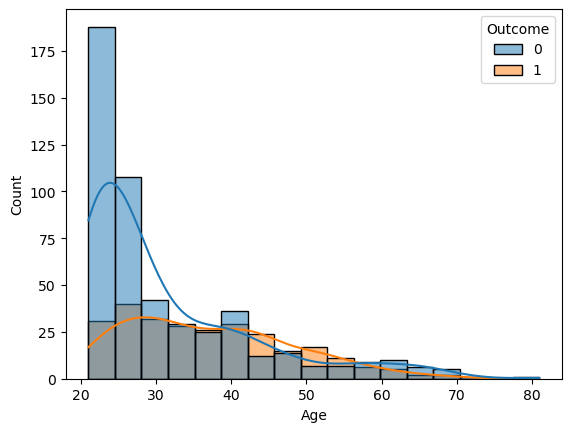

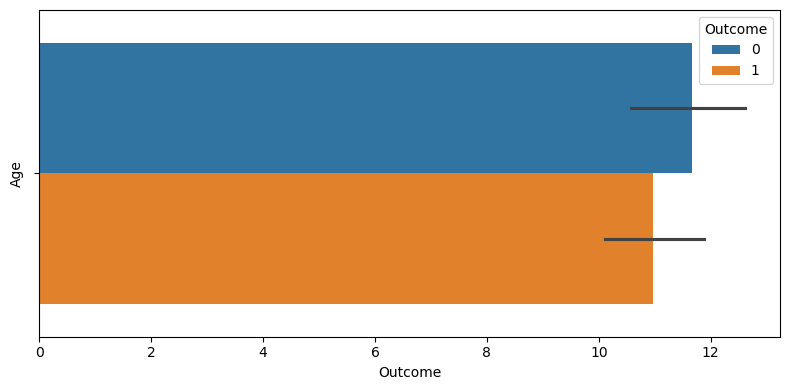

Reject H0


In [28]:
print('std\n',df['Age'].groupby(df['Outcome']).std())
print('mean\n',df['Age'].groupby(df['Outcome']).mean())
sns.histplot(x='Age',hue='Outcome',data=df,kde=True)
plt.figure(figsize=(8,4))
sns.barplot(hue=df.Outcome, x=df['Age'], estimator='std')
plt.xlabel('Outcome')
plt.ylabel('Age')
plt.tight_layout()
plt.show()
die_age = df['Age'][df['Outcome']==1]
nondie_age = df['Age'][df['Outcome']==0]
#h0 : both same
#h1 : both diff
from scipy.stats import ttest_ind
stat,p = ttest_ind(die_age,nondie_age)
alpha = 0.05
if p<alpha:
    print('Reject H0')
else:
    print('Accept H0')


In [29]:
#bmi
die_bmi = df['BMI'][df['Outcome']==1]
nondie_bmi = df['BMI'][df['Outcome']==0]
stat,p = ttest_ind(die_bmi,nondie_bmi)
alpha = 0.05
if p<alpha:
    print('Reject H0')
else:
    print('Accept H0')

Reject H0


std
 Outcome
0    0.299085
1    0.372354
Name: DiabetesPedigreeFunction, dtype: float64
mean
 Outcome
0    0.429734
1    0.550500
Name: DiabetesPedigreeFunction, dtype: float64


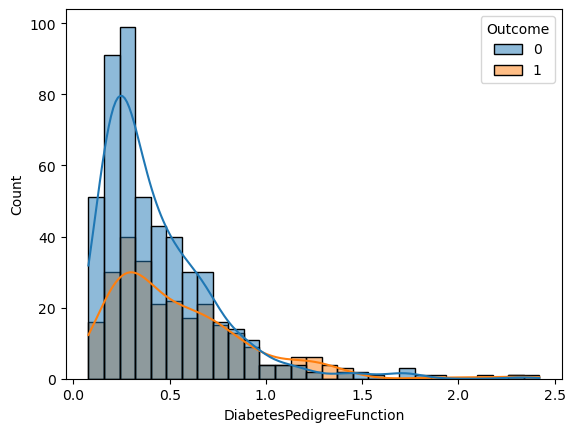

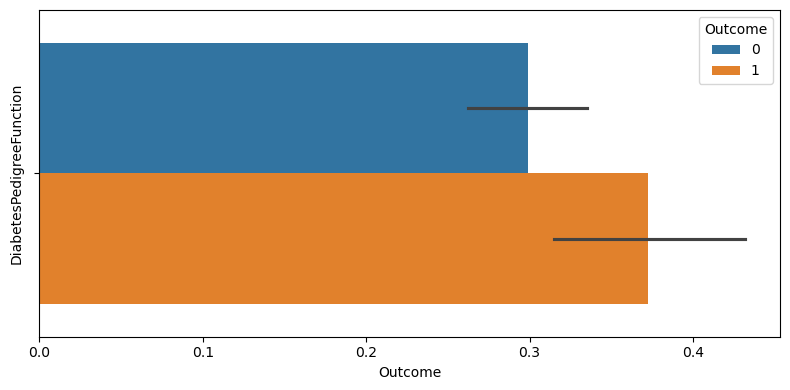

Reject H0


In [30]:
print('std\n',df['DiabetesPedigreeFunction'].groupby(df['Outcome']).std())
print('mean\n',df['DiabetesPedigreeFunction'].groupby(df['Outcome']).mean())
sns.histplot(x='DiabetesPedigreeFunction',hue='Outcome',data=df,kde=True)
plt.figure(figsize=(8,4))
sns.barplot(hue=df.Outcome, x=df['DiabetesPedigreeFunction'], estimator='std')
plt.xlabel('Outcome')
plt.ylabel('DiabetesPedigreeFunction')
plt.tight_layout()
plt.show()


#dpf


die_pdg = df['DiabetesPedigreeFunction'][df['Outcome']==1]
nondie_pdg = df['DiabetesPedigreeFunction'][df['Outcome']==0]
stat,p = ttest_ind(die_pdg,nondie_pdg)
alpha = 0.05
if p<alpha:
    print('Reject H0')
else:
    print('Accept H0')

- DiabetesPEdigreeFunction doesnt have any effect on Target Feature

std
 Outcome
0    11.929385
1    11.951672
Name: BloodPressure, dtype: float64
mean
 Outcome
0    70.920000
1    75.123134
Name: BloodPressure, dtype: float64


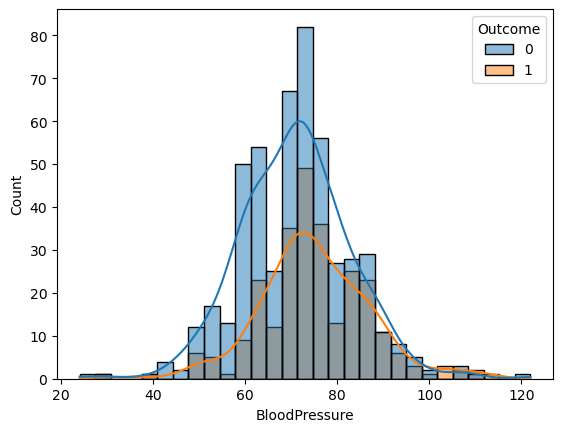

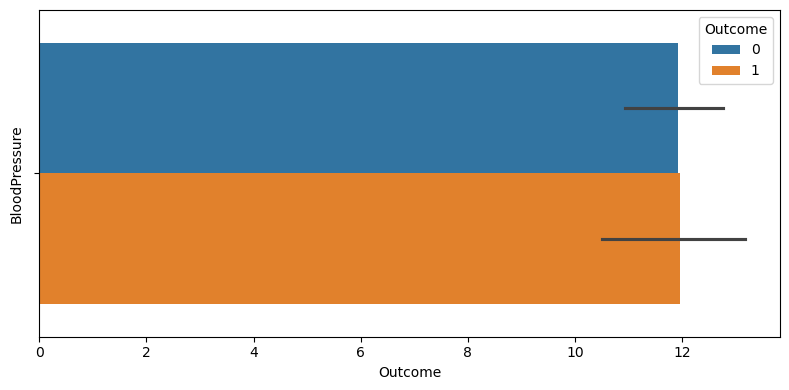

Reject H0


In [31]:
print('std\n',df['BloodPressure'].groupby(df['Outcome']).std())
print('mean\n',df['BloodPressure'].groupby(df['Outcome']).mean())
sns.histplot(x='BloodPressure',hue='Outcome',data=df,kde=True)
plt.figure(figsize=(8,4))
sns.barplot(hue=df.Outcome, x=df['BloodPressure'], estimator='std')
plt.xlabel('Outcome')
plt.ylabel('BloodPressure')
plt.tight_layout()
plt.show()
#bp
die_bp = df['BloodPressure'][df['Outcome']==1]
nondie_bp = df['BloodPressure'][df['Outcome']==0]
stat,p = ttest_ind(die_bp,nondie_bp)
alpha = 0.05
if p<alpha:
    print('Reject H0')
else:
    print('Accept H0')

- BloodPressurew doesnt have any effect on Target Feature

std
 Outcome
0     89.565700
1    127.689084
Name: Insulin, dtype: float64
mean
 Outcome
0     83.188000
1    116.041045
Name: Insulin, dtype: float64


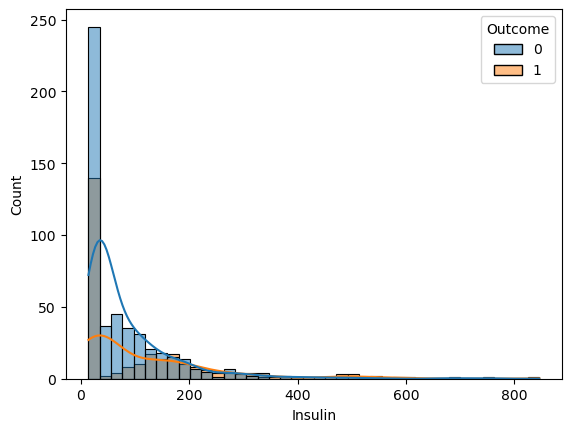

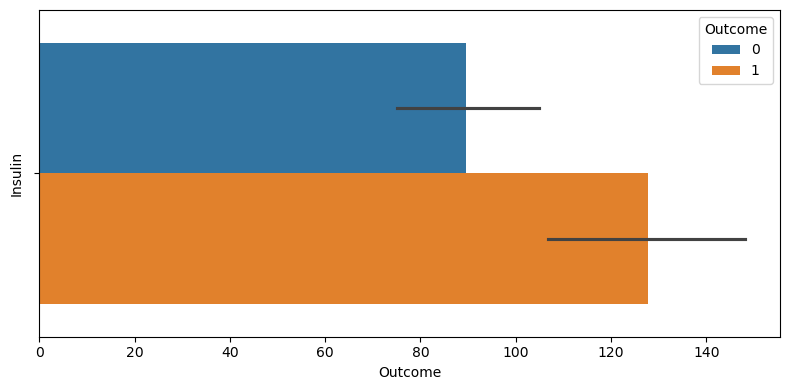

Reject H0


In [32]:
print('std\n',df['Insulin'].groupby(df['Outcome']).std())
print('mean\n',df['Insulin'].groupby(df['Outcome']).mean())
sns.histplot(x='Insulin',hue='Outcome',data=df,kde=True)
plt.figure(figsize=(8,4))
sns.barplot(hue=df.Outcome, x=df['Insulin'], estimator='std')
plt.xlabel('Outcome')
plt.ylabel('Insulin')
plt.tight_layout()
plt.show()
#bp
die_bp = df['Insulin'][df['Outcome']==1]
nondie_bp = df['Insulin'][df['Outcome']==0]
stat,p = ttest_ind(die_bp,nondie_bp)
alpha = 0.05
if p<alpha:
    print('Reject H0')
else:
    print('Accept H0')

- Insulin doesnt have any effect on Target Feature

std
 Outcome
0    24.707201
1    29.568839
Name: Glucose, dtype: float64
mean
 Outcome
0    110.682000
1    142.130597
Name: Glucose, dtype: float64


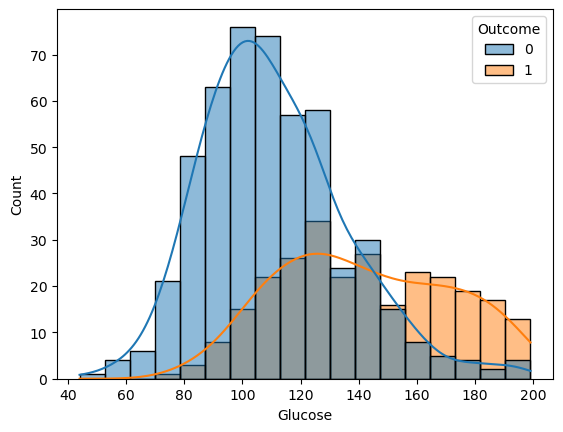

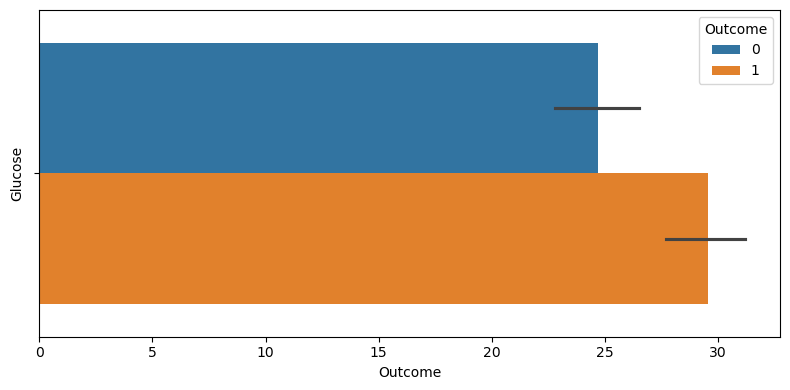

Reject H0


In [33]:
print('std\n',df['Glucose'].groupby(df['Outcome']).std())
print('mean\n',df['Glucose'].groupby(df['Outcome']).mean())
sns.histplot(x='Glucose',hue='Outcome',data=df,kde=True)
plt.figure(figsize=(8,4))
sns.barplot( x=df['Glucose'],hue=df.Outcome, estimator='std')
plt.xlabel('Outcome')
plt.ylabel('Glucose')
plt.tight_layout()
plt.show()
#bp
die_g = df['Glucose'][df['Outcome']==1]
nondie_g = df['Glucose'][df['Outcome']==0]
stat,p = ttest_ind(die_bp,nondie_bp)
alpha = 0.05
if p<alpha:
    print('Reject H0')
else:
    print('Accept H0')

-Glucose has no effect on target

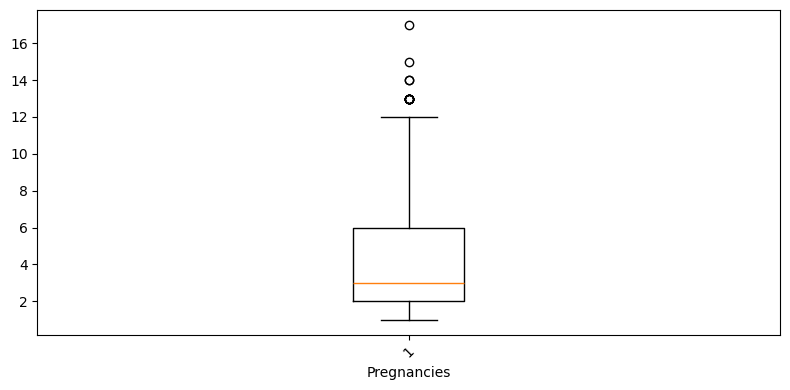

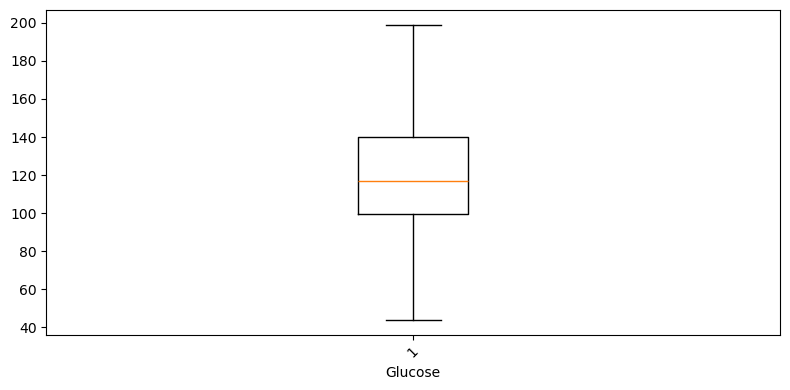

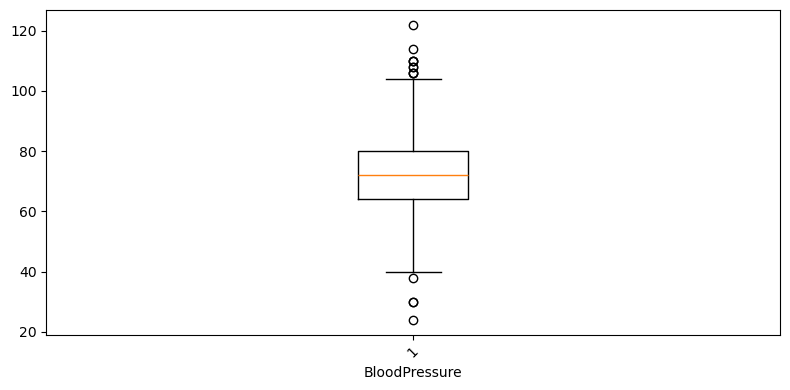

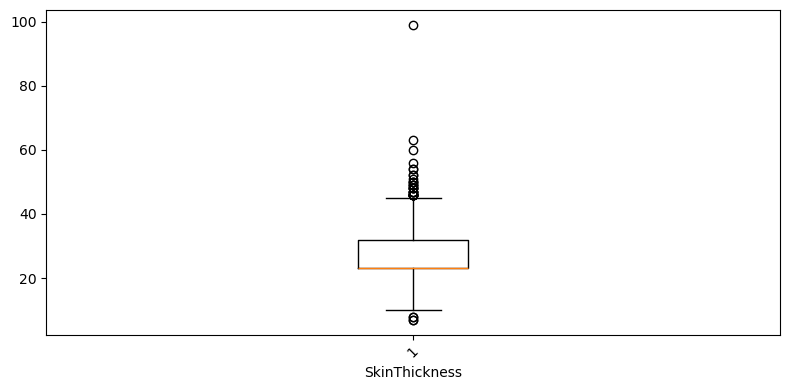

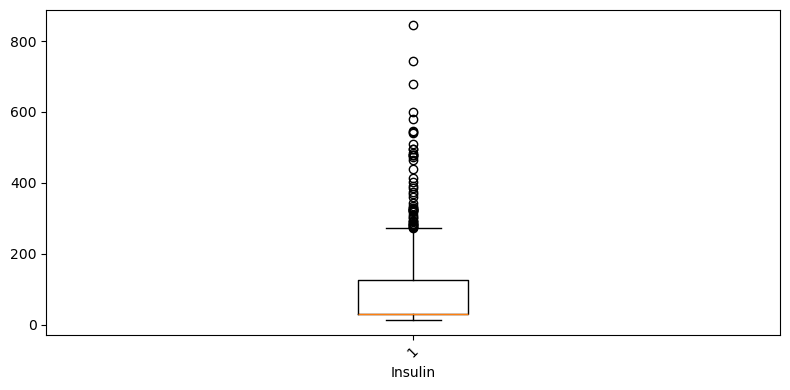

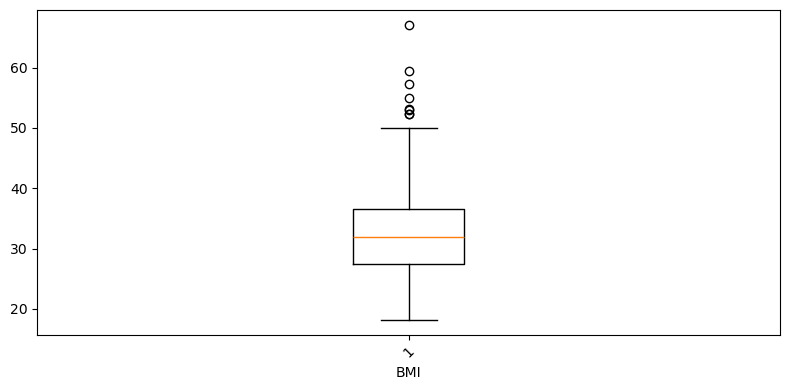

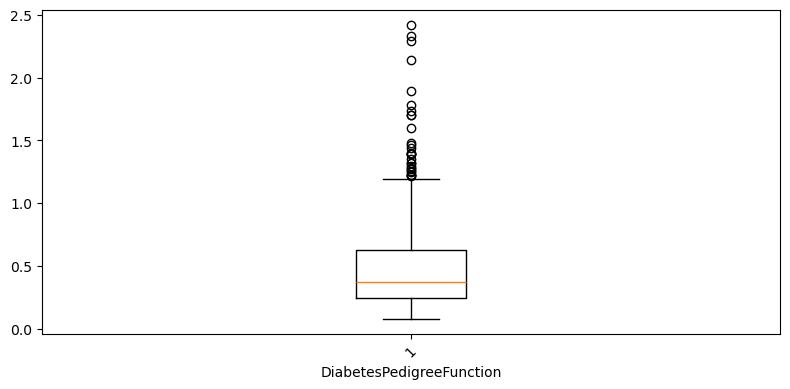

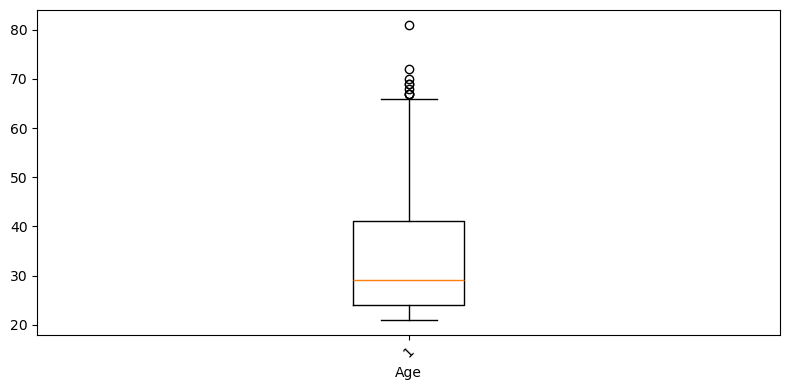

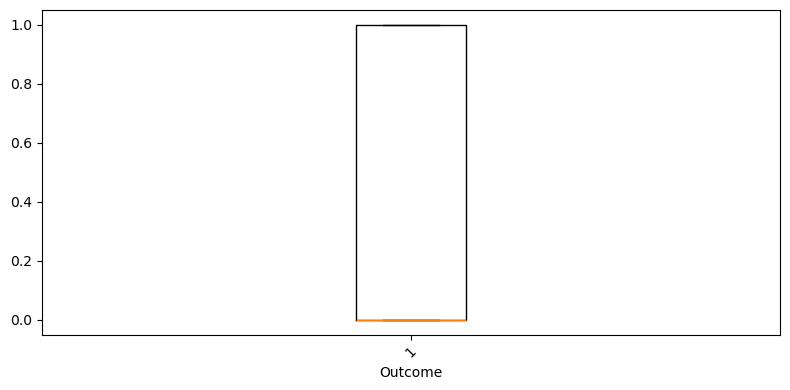

In [34]:
for col in df.columns:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[col])
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [35]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values


In [36]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x=sc.fit_transform(x)


In [37]:
from sklearn.model_selection import train_test_split

xtr,xts,ytr,yts = train_test_split(x,y,train_size=0.7,random_state=42)

In [38]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(xtr,ytr)

LogisticRegression()

In [39]:
pred = model.predict(xtr)

In [40]:
from sklearn.metrics import mean_squared_error,accuracy_score
accuracy_score(ytr,pred)

0.7728119180633147

In [41]:

ypred = model.predict(xts)
accuracy_score(yts,ypred)


0.7619047619047619

In [48]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
recall = recall_score(yts,ypred)
precision = precision_score(yts,ypred)
f1 = f1_score(yts,ypred)
cm = confusion_matrix(ytr,pred)
print('Recall',recall)
print('Precision',precision)
print('f1',f1)
print('confusion',cm)

Recall 0.5875
Precision 0.6811594202898551
f1 0.6308724832214765
confusion [[316  33]
 [ 89  99]]


In [44]:
model.predict_proba(xts)

array([[0.72522977, 0.27477023],
       [0.79048449, 0.20951551],
       [0.85750917, 0.14249083],
       [0.7871785 , 0.2128215 ],
       [0.50593878, 0.49406122],
       [0.58417664, 0.41582336],
       [0.97021341, 0.02978659],
       [0.6260352 , 0.3739648 ],
       [0.46920075, 0.53079925],
       [0.32047103, 0.67952897],
       [0.71947309, 0.28052691],
       [0.1520764 , 0.8479236 ],
       [0.58389228, 0.41610772],
       [0.73659908, 0.26340092],
       [0.90776627, 0.09223373],
       [0.67670447, 0.32329553],
       [0.85273683, 0.14726317],
       [0.89086346, 0.10913654],
       [0.34050203, 0.65949797],
       [0.49090936, 0.50909064],
       [0.76490193, 0.23509807],
       [0.88471892, 0.11528108],
       [0.51399529, 0.48600471],
       [0.87904743, 0.12095257],
       [0.47733169, 0.52266831],
       [0.17823257, 0.82176743],
       [0.84484111, 0.15515889],
       [0.93382115, 0.06617885],
       [0.71941741, 0.28058259],
       [0.85768865, 0.14231135],
       [0.

In [46]:
from sklearn.metrics import roc_curve


fpr,tpr,thresholds= roc_curve(yts,ypred)